# Name: Pragi Singh

# Task 03: Exploratory Data Analysis- Retail

In [1]:
# import Libraries
import pandas as pd
import matplotlib.pyplot as plt
# Filter Warnings
import warnings
warnings.filterwarnings("ignore")

# Visualization of Data

In [2]:
Superstore=pd.read_csv("SampleSuperstore.csv")

In [4]:
Superstore.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
Superstore.shape

(9994, 13)

In [6]:
Superstore.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [7]:
Superstore["Ship Mode"].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [8]:
Superstore.ndim

2

In [9]:
# info data
Superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [10]:
Superstore.drop(["Postal Code","Country"],axis="columns",inplace=True)

In [11]:
Superstore.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [12]:
import seaborn as sns

# Graph Analysis

1. countplot on Shipping Mode: It show Standard Class is mostly used

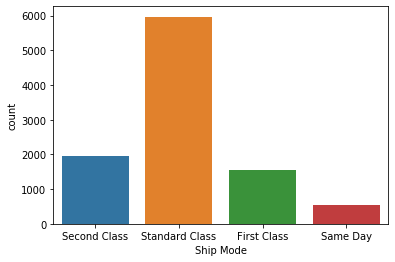

In [13]:
sns.countplot("Ship Mode",data=Superstore)

2. Graph between Discount and different Segments: It describe the distribution of discounts in diferent Segments

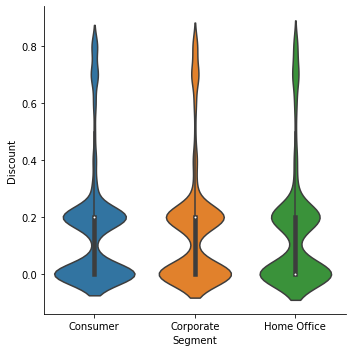

In [14]:
sns.catplot(x="Segment",y="Discount",data=Superstore,kind="violin")

In [15]:
Category= Superstore.groupby("Category")

3. Garph betweeen Profit and Sales with Category : It describe the sales of technology is large and Profit in furniture is very less.

<Figure size 720x1440 with 0 Axes>

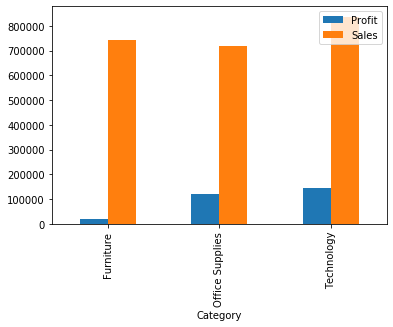

In [16]:
plt.figure(figsize=(10,20))
Category["Profit","Sales"].sum().plot.bar()
plt.legend(loc="upper right")


4. Graph between number of discount range in different Segments

<Figure size 1080x2160 with 0 Axes>

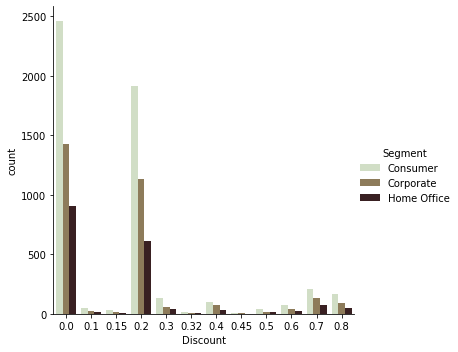

In [17]:
plt.figure(figsize=(15,30))
sns.catplot(x="Discount",kind="count",palette="ch:0.7",data=Superstore,hue="Segment")

# Profit and sales of Superstore By categorization with City and Region

In [18]:
city=Superstore.groupby(["City","Region"])
df2=city["Profit","Sales"].sum()
df2

,,Profit,Sales
City,Region,,
Aberdeen,Central,6.6300,25.500
Abilene,Central,-3.7584,1.392
Akron,East,-186.6356,2729.986
Albuquerque,West,634.0881,2220.160
Alexandria,South,318.6183,5519.570
...,...,...,...
Woonsocket,East,78.6791,195.550
Yonkers,East,2767.7557,7657.666
York,East,-102.1692,817.978


# Graph visualization using Plottly: A Beautiful Library


In [19]:
# import plotly
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [20]:
df3=Superstore[["Profit","Sales","City","Region"]]
Region_count=df3["Region"].value_counts(sort=True)

 Pie chart on Profit's percentage in different Region

In [21]:
colors = ['#f4cb42', '#a1a8b5'] #gold,silver

values=df3["Profit"]
labels=df3["Region"]
pie = go.Pie(labels=labels, values=values, marker=dict(colors=colors))


layout = go.Layout(title="Profit")
fig = go.Figure(data=[pie], layout=layout)
py.iplot(fig)



In [22]:
df3=Superstore[["Profit","Sales","City","Region"]]
Region_count=df3["Region"].value_counts(sort=True)

Pie chart on Sale's percentage in different Region

In [24]:
colors = ['#f4cb42', '#a1a8b5'] #gold,silver

values=df3["Sales"]
labels=df3["Region"]
pie = go.Pie(labels=labels, values=values, marker=dict(colors=colors))


layout = go.Layout(title="Sales")
fig = go.Figure(data=[pie], layout=layout)
py.iplot(fig)

# Countplot on Number of different Categories present in Superstore Data
It shows that Binders and paper has large count where as copies and Machines has least count

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

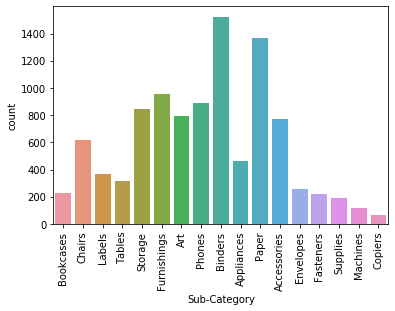

In [25]:
sns.countplot("Sub-Category",data=Superstore)
plt.xticks(rotation=90)

Graph between number of Sales with different Mode of Shipping

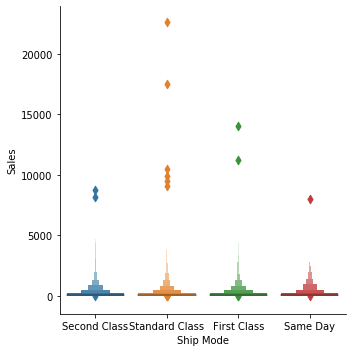

In [26]:
sns.catplot(x="Ship Mode",y="Sales",data=Superstore,kind="boxen")

# Correlation Matrix

In [27]:
corr=Superstore.corr()

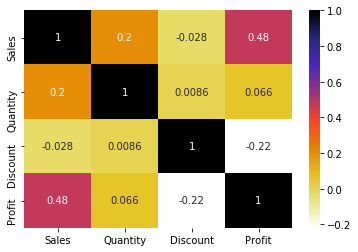

In [28]:
sns.heatmap(corr,annot=True,cmap=plt.cm.CMRmap_r)

In [52]:
sub_category=Superstore.groupby("Sub-Category")

# It shows average Sales and Profit of Different sub_categories

In [53]:
sub_category["Sales","Profit"].mean()

,Sales,Profit
Sub-Category,,
Accessories,215.974604,54.111788
Appliances,230.755710,38.922758
Art,34.068834,8.200737
Binders,133.560560,19.843574
Bookcases,503.859633,-15.230509
Chairs,532.332420,43.095894
Copiers,2198.941618,817.909190
Envelopes,64.867724,27.418019
Fasteners,13.936774,4.375660


In [54]:
category=Superstore.groupby("Category")

# It shows average Sales and Profit of Different categories


In [55]:
Category["Sales","Profit"].mean()

,Sales,Profit
Category,,
Furniture,349.834887,8.699327
Office Supplies,119.324101,20.327050
Technology,452.709276,78.752002
